# STUDENT PERFORMANCE INDICATOR

## Problem Statement

#### This model understance and predict how well the student perform in terms of test score under various factor like gender , Parent level of education etc

### 1) Import data set and related libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('stud_data.csv')

In [3]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

### 2) Different data check

#### 2.1) Data information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 2.2) Check for null value and duplicate value in dataset

In [6]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
data.duplicated().sum()

0

#### 2.3) Checking no of unique values

In [8]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 2.4) Statistics of data

In [9]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 2.5) Define neumerical and categorical values

In [10]:
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print('we have {} numerical feature in data set which are {}' .format(len(num_features), num_features))

print('we have {} categorical feature which are{}'.format(len(cat_features), cat_features))

we have 3 numerical feature in data set which are ['math_score', 'reading_score', 'writing_score']
we have 5 categorical feature which are['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for Total score and Average score

In [11]:
data['Total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['Average_score'] = data['Total_score']/3

data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Calculate no of students with Full score

In [12]:
maths_full = data[data['math_score']==100]['Total_score'].count()

reading_full = data[data['reading_score']==100]['Total_score'].count()

writing_full = data[data['writing_score']==100]['Total_score'].count()

In [13]:
print('No of students who get full marks in Maths are', maths_full)
print('No of students who get full marks in Reading are', reading_full)
print('No of students who get full marks in Writing are', writing_full)


No of students who get full marks in Maths are 7
No of students who get full marks in Reading are 17
No of students who get full marks in Writing are 14


#### Calculate no of student who receive score less than 20

In [14]:
maths_less = data[data['math_score'] <= 20]['Total_score'].count()

reading_less = data[data['reading_score']<=20]['Total_score'].count()

writing_less = data[data['writing_score']<=20]['Total_score'].count()

In [15]:
print('No of students with less than 20 marks in Maths are', maths_less)
print('No of students with less than 20 marks in Reading are', reading_less)
print('No of students with less than 20 marks in Writing are', writing_less)

No of students with less than 20 marks in Maths are 4
No of students with less than 20 marks in Reading are 1
No of students with less than 20 marks in Writing are 3


### Conclusion

From above data e can say that students has perform worst in Maths and Best in Reading

## Data Visualization

#### Histogram and KDE (Kernel Distribution function)

#### 1) Average score 

<Axes: xlabel='Average_score', ylabel='Count'>

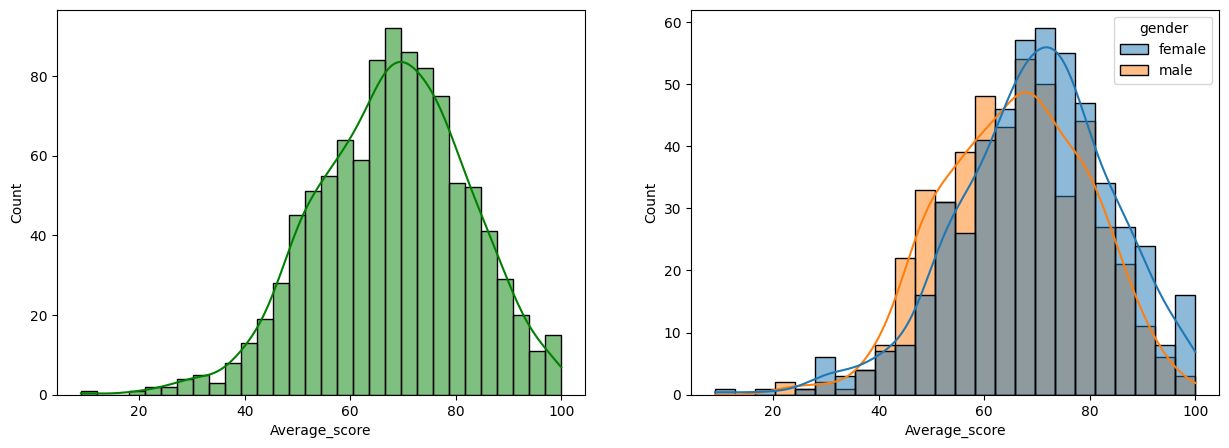

In [31]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

plt.subplot(121)
sns.histplot(data=data, x='Average_score', bins=30, kde= True, color ='g')

plt.subplot(122)
sns.histplot(data = data, x='Average_score', kde=True, hue='gender')

plt.show()

<Axes: xlabel='Total_score', ylabel='Count'>

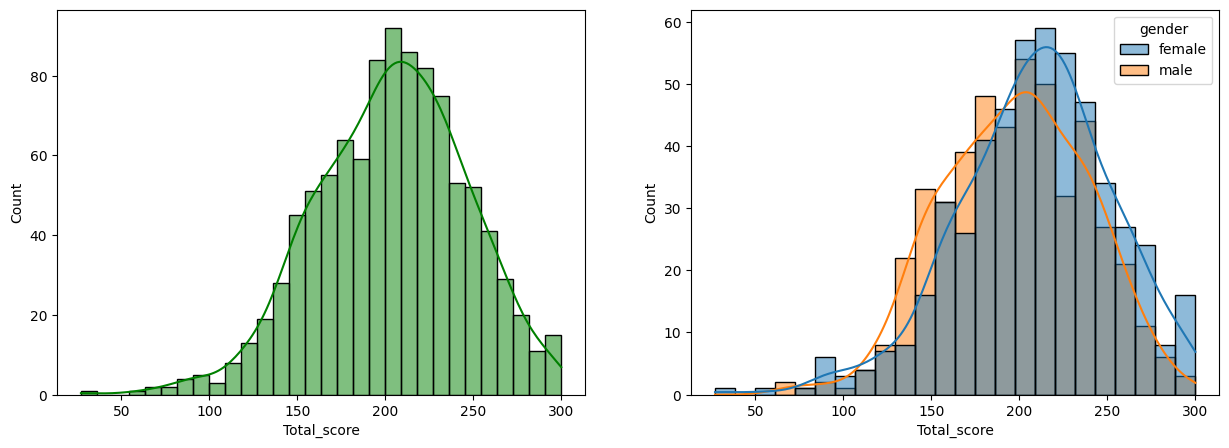

In [32]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

plt.subplot(121)
sns.histplot(data=data, x='Total_score', bins=30, kde= True, color ='g')

plt.subplot(122)
sns.histplot(data = data, x='Total_score', kde=True, hue='gender')

plt.show()

#####  Female students student tends to score more than male students

#### 2) Average score with respect to Race_ethnicity

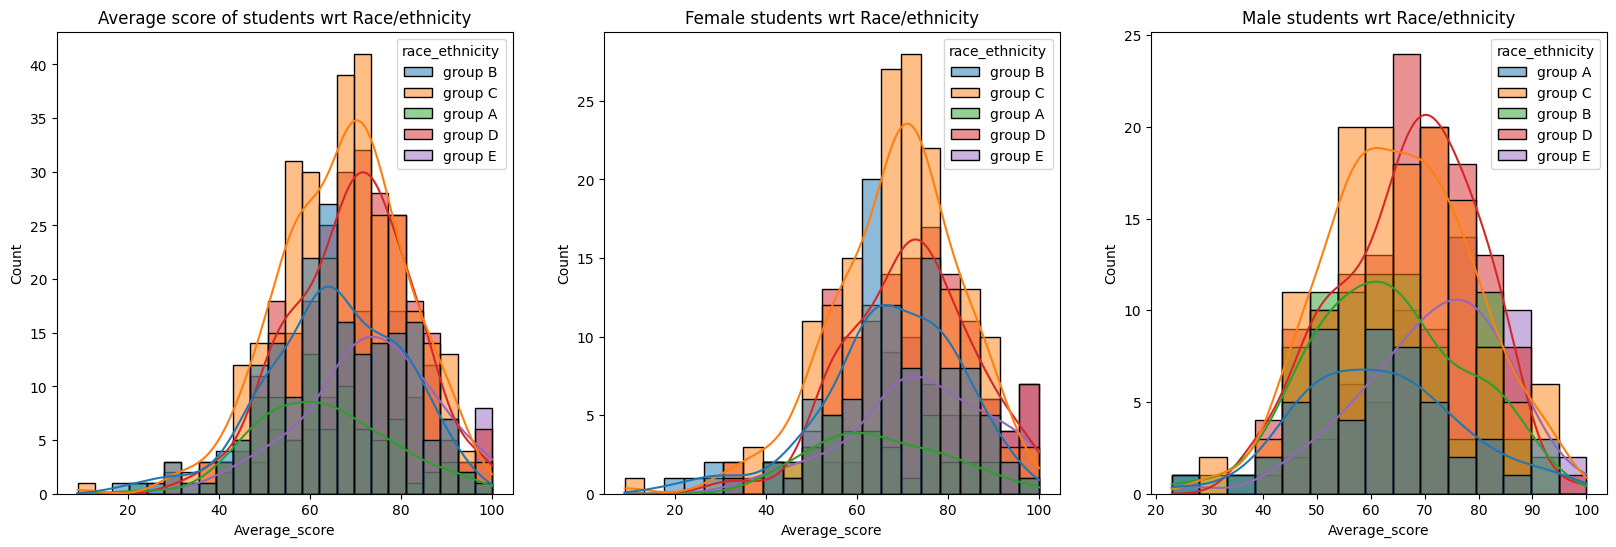

In [49]:
plt.subplots(1,3, figsize=(20,6))

plt.subplot(131)
ax= sns.histplot(data= data, x='Average_score', kde=True, hue='race_ethnicity')
plt.title('Average score of students wrt Race/ethnicity')

plt.subplot(132)
ax= sns.histplot(data=data[data.gender=='female'], x='Average_score', kde= True, hue='race_ethnicity')
plt.title('Female students wrt Race/ethnicity')

plt.subplot(133)
ax=sns.histplot(data= data[data.gender=='male'], x='Average_score', kde=True, hue='race_ethnicity')
plt.title('Male students wrt Race/ethnicity')

plt.show()



##### Group C Perform best on an average and Female students, For Male students Group D performs best

#### 3) Average score based on Parental level of education

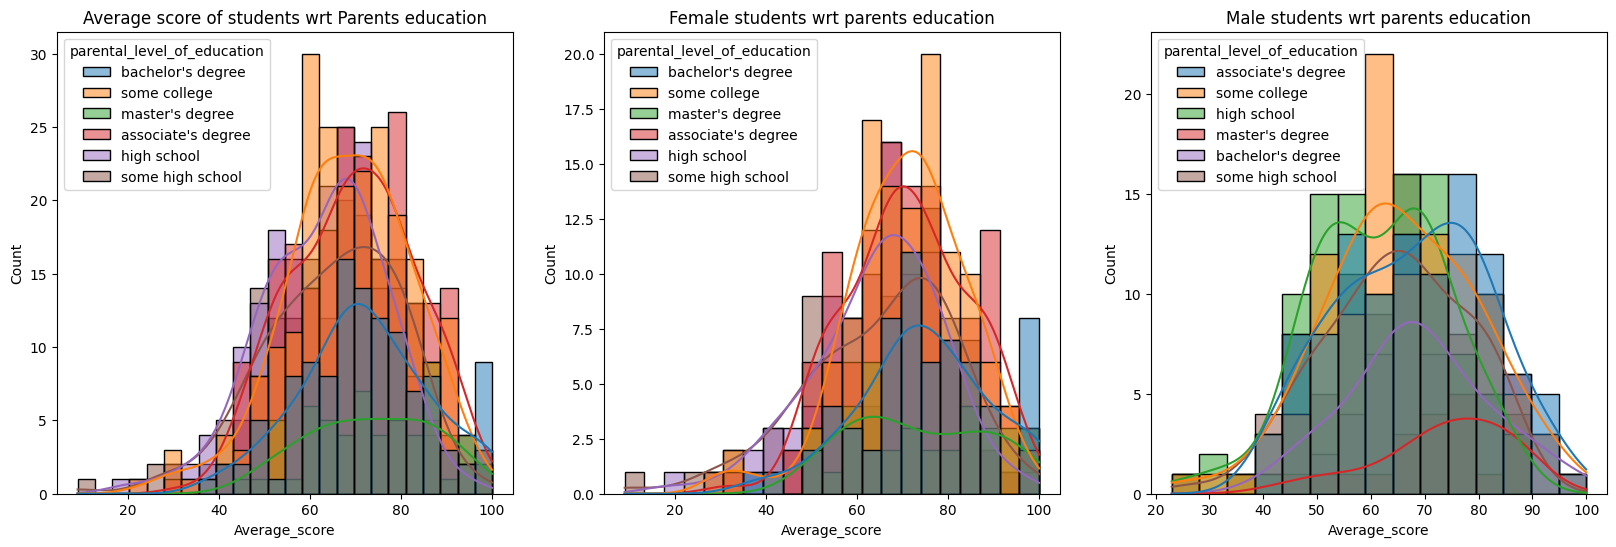

In [71]:
plt.subplots(1,3, figsize=(20,6))

plt.subplot(131)
sns.histplot(data=data, x='Average_score', kde=True, hue ='parental_level_of_education')
plt.title('Average score of students wrt Parents education')

plt.subplot(132)
sns.histplot(data=data[data.gender=='female'], x='Average_score', kde=True, hue='parental_level_of_education')
plt.title('Female students wrt parents education')

plt.subplot(133)
sns.histplot(data=data[data.gender=='male'], x='Average_score', kde=True, hue='parental_level_of_education')
plt.title('Male students wrt parents education')

plt.show()

##### For studnets whose Parents education with college degree tends to score more, while with masters degree score is low

#### 4) Average score based on lunch

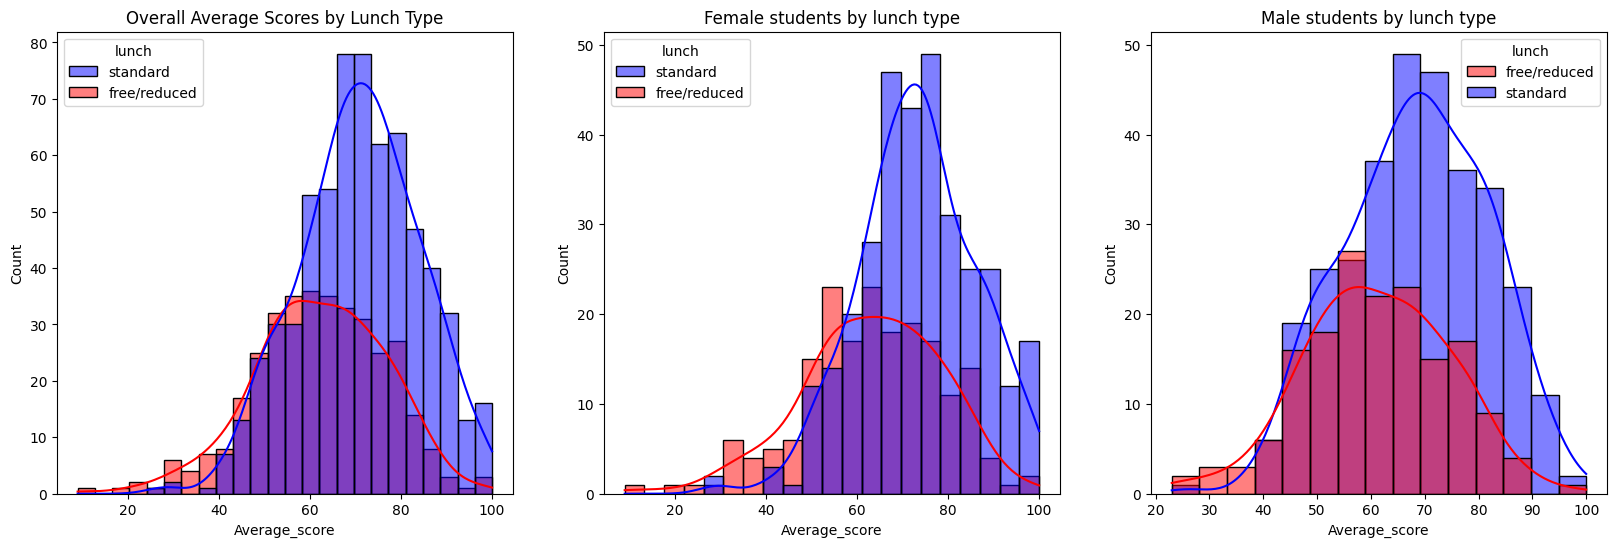

In [66]:
plt.subplots(1,3, figsize=(20,6))

lunch_color = {'standard':'blue', 'free/reduced':'red'}

plt.subplot(131)
sns.histplot(data=data, x='Average_score', kde=True, hue ='lunch', palette=lunch_color)
plt.title('Overall Average Scores by Lunch Type')

plt.subplot(132)
sns.histplot(data=data[data.gender=='female'], x='Average_score', kde=True, hue='lunch', palette=lunch_color)
plt.title('Female students by lunch type')

plt.subplot(133)
sns.histplot(data=data[data.gender=='male'], x='Average_score', kde=True, hue='lunch', palette=lunch_color)
plt.title('Male students by lunch type')

plt.show()

##### students with standard lunch has scure more marks

#### 5) Average score of students wrt Test prepration course

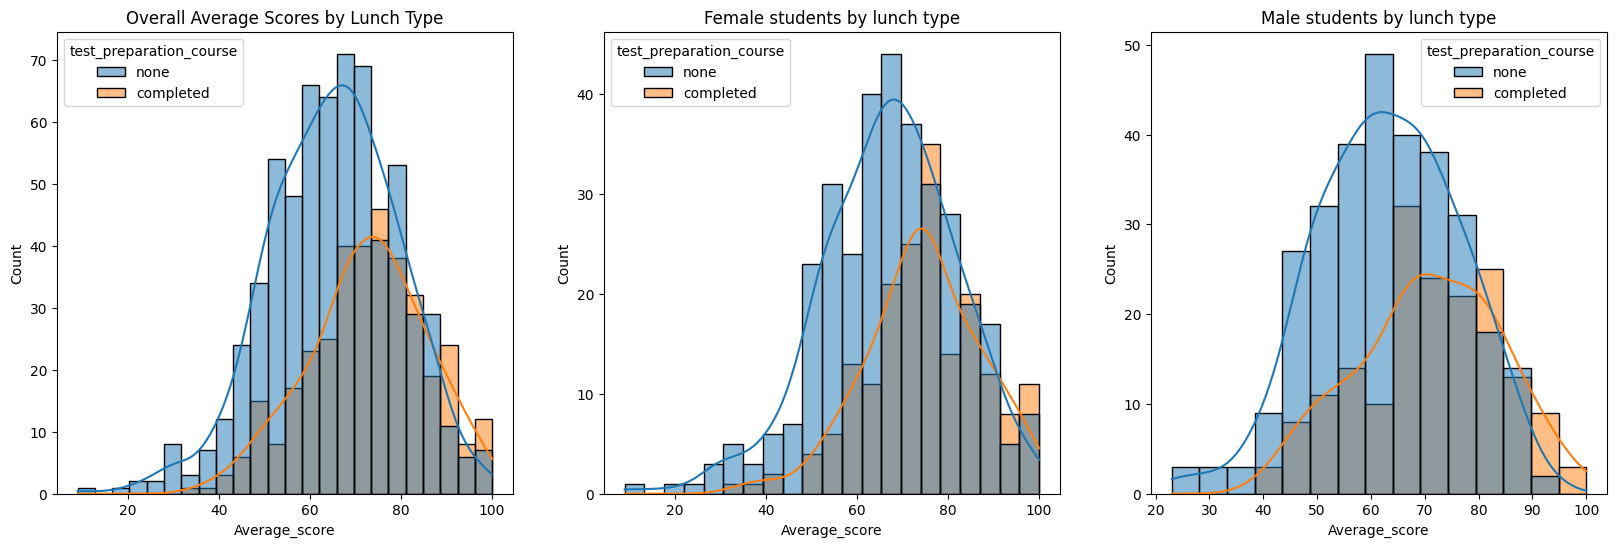

In [67]:
plt.subplots(1,3, figsize=(20,6))

plt.subplot(131)
sns.histplot(data=data, x='Average_score', kde=True, hue ='test_preparation_course')
plt.title('Overall Average Scores by Lunch Type')

plt.subplot(132)
sns.histplot(data=data[data.gender=='female'], x='Average_score', kde=True, hue='test_preparation_course')
plt.title('Female students by lunch type')

plt.subplot(133)
sns.histplot(data=data[data.gender=='male'], x='Average_score', kde=True, hue='test_preparation_course')
plt.title('Male students by lunch type')

plt.show()

##### Students without completed test prepration course have more marks.

#### 6) Maximum score fo students in all three subjects

<Axes: title={'center': 'Writing Score'}, ylabel='writing_score'>

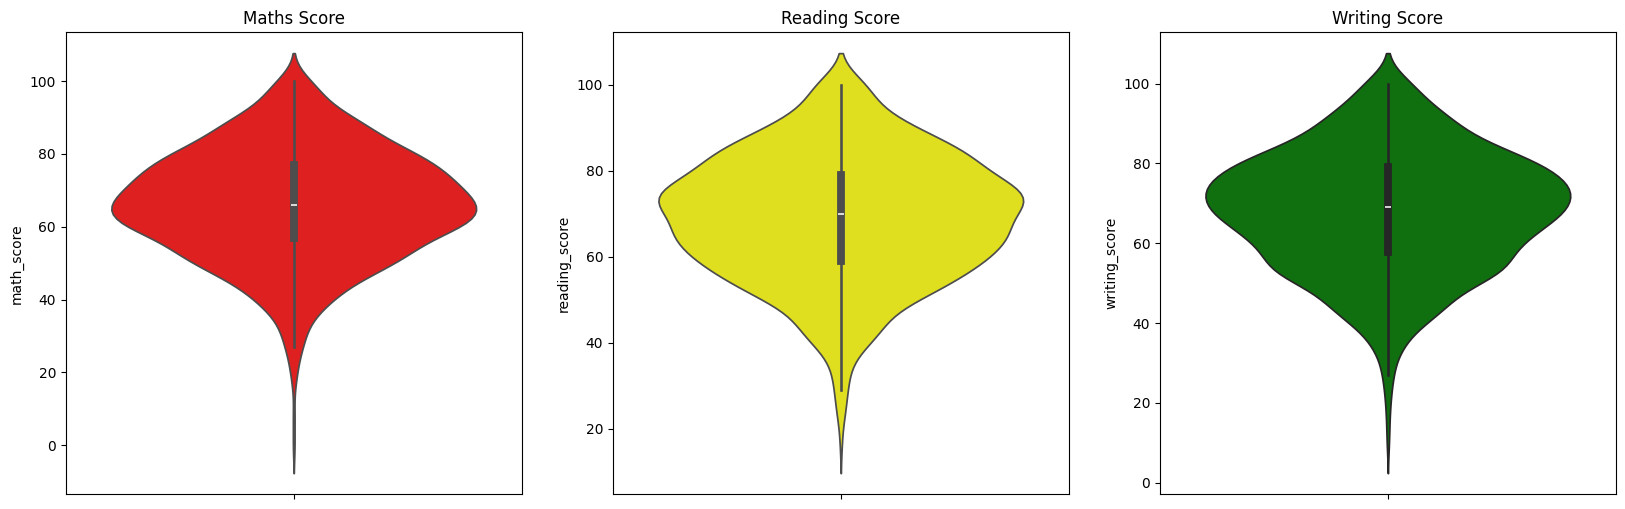

In [77]:
plt.subplots(1,3, figsize=(20,6))

plt.subplot(131)
plt.title('Maths Score')
sns.violinplot(data=data, y='math_score', color='red')

plt.subplot(132)
plt.title('Reading Score')
sns.violinplot(data=data, y='reading_score', color='yellow')

plt.subplot(133)
plt.title('Writing Score')
sns.violinplot(data=data, y='writing_score', color='green')